Observación: algunas librerías se van a importar más de una vez, con el fin de poder ejecutar fragmentos de código relativmamete pequeños

## Nivel 1

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.


In [11]:
# pip install mysql-connector-python

In [1]:
# Listado de tablas

import mysql.connector

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="xo6vH/NL^xT<Kf{XE`$%",
    database="ventas"
)

mycursor = mydb.cursor()

mycursor.execute("SHOW TABLES")

tables = mycursor.fetchall()

tables

[('companies',),
 ('credit_cards',),
 ('diferencia 2021-2022',),
 ('estado_tarjetas',),
 ('precio máximo por persona',),
 ('precios max usuarios',),
 ('precios min usuarios',),
 ('precios min-max usuarios',),
 ('products',),
 ('products_transactions',),
 ('trans totales y rechazadas',),
 ('transactions',),
 ('transactions_split_temp',),
 ('ultimas_compras',),
 ('users',),
 ('users_prueba',)]

In [2]:
# Importación tabla transactions 
import pandas as pd

mycursor.execute("SELECT * FROM transactions")

data = mycursor.fetchall()


columns = [i[0] for i in mycursor.description]

mydb.close()

df = pd.DataFrame(data, columns=columns)
df

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91845898240,-12.52755619840
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96948858880,-117.52518359040
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.22268057600,-129.04987955200
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.35930552320,-100.55592806400
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.73814456320,158.29821030400
...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.31947171840,-11.41349120000
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01216819200,-64.67154380800
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86045317120,-172.34572933120
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07514337280,-142.24169564160


### - Ejercicio 1
Una variable numérica.

Text(0.5, 1.0, 'Histograma de cantidades gastadas en las transacciones')

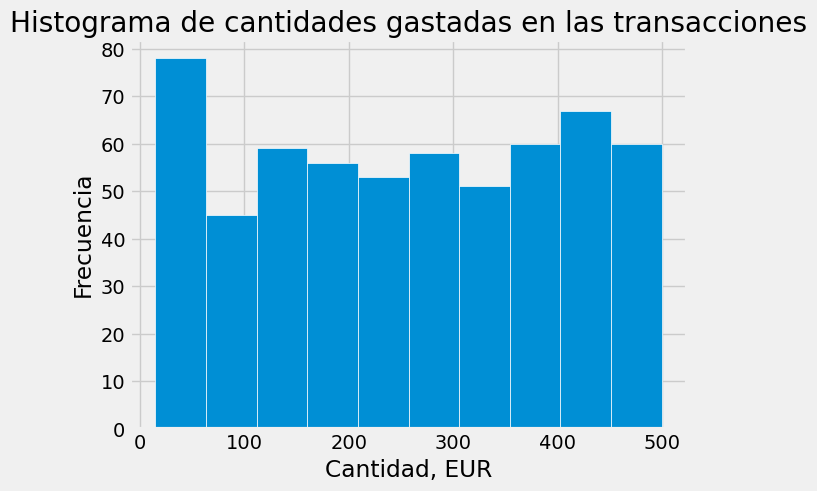

In [4]:
# Se representará el histograma del campo 'amount' de la tabla 'transactions'

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.hist(df['amount'], bins = 10, edgecolor ='white')
plt.xlabel('Cantidad, EUR')
plt.ylabel('Frecuencia')
plt.title('Histograma de cantidades gastadas en las transacciones')

Este histograma revela que el gasto por transacción más común es por debajo de los 50 EUR. Sorprendentemente, el gasto ménos común es de 50 a 100 euros. La distribución que se observa no tiene lógica ya que los gastos altos parecen ser igual de probables que los bajos. Esto puede ser debido a que los datos son ficticios y se han generado con un RNG.



### - Ejercicio 2
Dos variables numéricas.

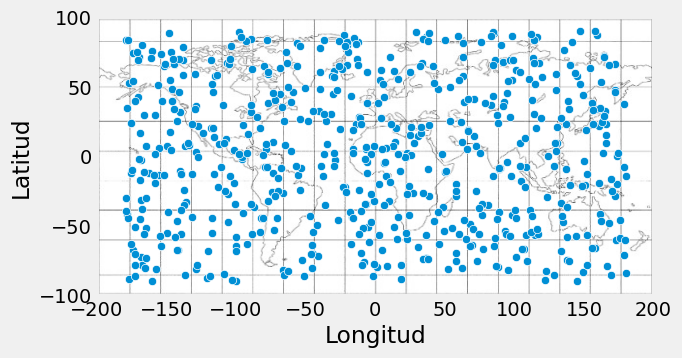

In [5]:
# Se van a representar las coordenadas geográficas de la tabla transactions con un scatterplot
# Para mejorar la interpretación, las coordenadas se representarán sobre un mapa del mundo con el mismo rango de ejes que el plot por defecto sin fondo

import matplotlib.image as mpimg

fondo = mpimg.imread('map.jpg')

plt.imshow(fondo, extent=[-200, 200, -100, 100]) 

plt.scatter(df['longitude'], df['lat'],edgecolors='white')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(False)  # Evitar que se muestre la trama para no interferir con la de la imagen jpg

plt.show()

 Al igual que en S5.01. Nivel 3 Ej 1, se observa que las coordenadas presentan una distribución aleatoria sobre el mapa, aparentemente porque no son reales sino se han generado aleatoriamente.

### - Ejercicio 3
Una variable categórica.

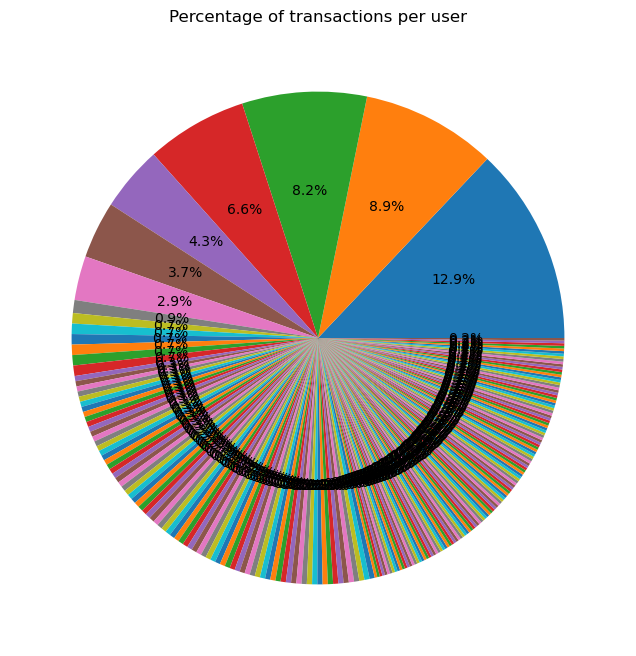

In [4]:
# Se ha escogido la variable categórica user_id.
# Se mostrará  el número de transacciones de los 10 usuarios principales en un gráfico de tipo tarta

# Resultado sin el formateado especial de arriba
import matplotlib.pyplot as plt

# Assuming 'dataset' represents your dataset in Power BI
user_id = df['user_id']

# Count occurrences of each user ID
user_id_counts = user_id.value_counts()

# Create data for all user IDs
sizes = user_id_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=None, autopct='%1.1f%%')

plt.title('Percentage of transactions per user')

plt.show()


Se observa que la mayoría de las etiquetas están solapadas. Para evitarlo se dejarán solo las que corresponden a los usuarios con más transacciones

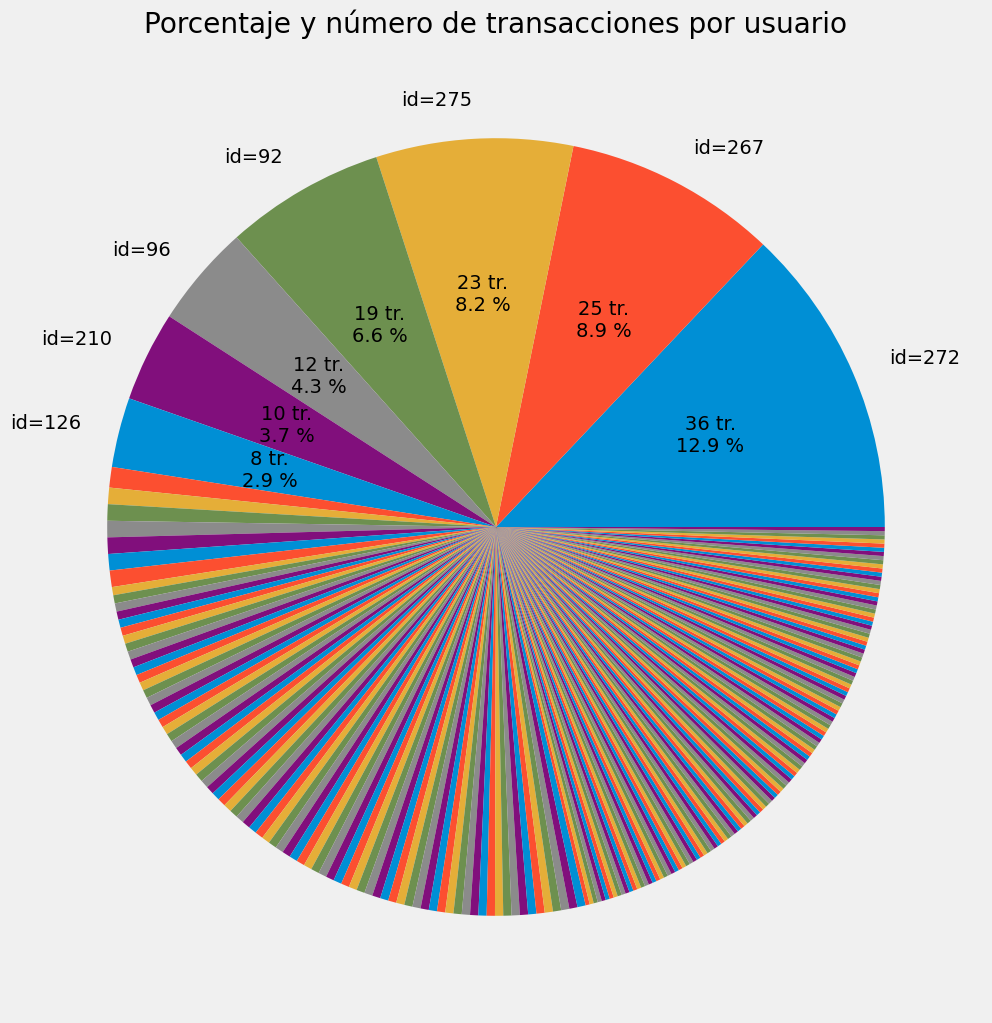

In [16]:
# Se observa que 7 usuarios son responsables de casi la mitad de las transacciones registradas, 
# de modo que se modifica el formato para dejar visibles las etiquetas solo de estos 

import matplotlib.pyplot as plt

user_id_counts = df['user_id'].value_counts() 
top_seven_counts = user_id_counts.head(7)  # Get counts for top 7 user IDs

# Calcular el porcentaje del total de transacciones para los top 7 usuarios
total_top_seven = top_seven_counts.sum()
percentages_top_seven = top_seven_counts / total_top_seven * 100

# Crear etiquetas para los IDs de usuario
labels = ['id=' + str(user_id) for user_id in user_id_counts.index]

# Crear datos para todos los IDs de usuario
sizes = user_id_counts.tolist()

# Sustituir las etiquetas para Ids mayores de 7 con una cadena de texto vacía 
labels[7:] = [''] * (len(labels) - 7)

# Crear una función autopct para mostrar el recuento y el porcentaje para los id-s de los top 7
def autopct_func(pct):
    if pct > 2.8:
        count = total_top_seven * pct / 100
        return '{:.0f} tr.\n{:.1f} %'.format(count, pct)
    else:
        return ''

# Moostrar la tarta con las etiquetas
plt.figure(figsize=(12, 12))
plt.pie(sizes, labels=labels, autopct=autopct_func)

plt.title('Porcentaje y número de transacciones por usuario')

plt.show()

### - Ejercicio 4
Una variable categórica y una numérica.

In [10]:
# Una de las posibilidades es generar un plot interactivo con la cantidad gastada por cada usuario

import plotly.express as px

fig = px.scatter(df, x='card_id', y='amount', labels={'card_id': 'Card ID', 'amount': 'Cantidad'})
fig.update_layout(xaxis=dict(showticklabels=False, title='Card ID'), yaxis=dict(title='Cantidad'))
fig.show()

C:\Users\rados\AppData\Local\Temp\ipykernel_3192\88426614.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



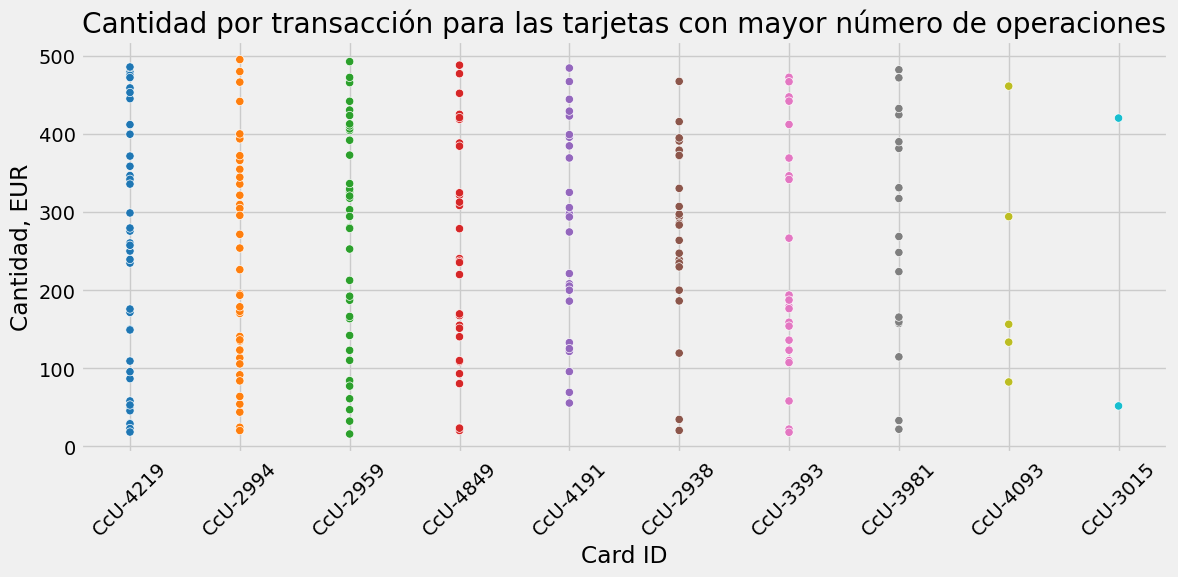

In [39]:
# Debido a que en Tarea S8.02. no se podrá representar el plot interractivo mostrado arriba, 
# se genera un plot no interractivo, pero solo con los card_id-s que tienen el mayor número operraciones. 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Top N card_id-s por número de transacciones
top_n = 10
top_card_ids = df['card_id'].value_counts().nlargest(top_n).index

# Filtrado del DataFrame dejando solo las filas que corresponden a los top N
df_top_n = df[df['card_id'].isin(top_card_ids)]
df_top_n

# Número de puntos(transacciones) por cada card_id
num_points_per_card_id = df_top_n['card_id'].value_counts()

# Ordenar los card_id-s por número de puntos
ordered_card_ids = num_points_per_card_id.sort_values(ascending=False).index

# Convertir los datos de 'card_id' a tipo categórico, con categorías ordenadas
df_top_n['card_id'] = pd.Categorical(df_top_n['card_id'], categories=ordered_card_ids, ordered=True)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_n, x='card_id', y='amount', hue='card_id', palette='tab10', legend=False)

plt.xlabel('Card ID')
plt.ylabel('Cantidad, EUR')
plt.title('Cantidad por transacción para las tarjetas con mayor número de operaciones')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### - Ejercicio 5
Dos variables categóricas.

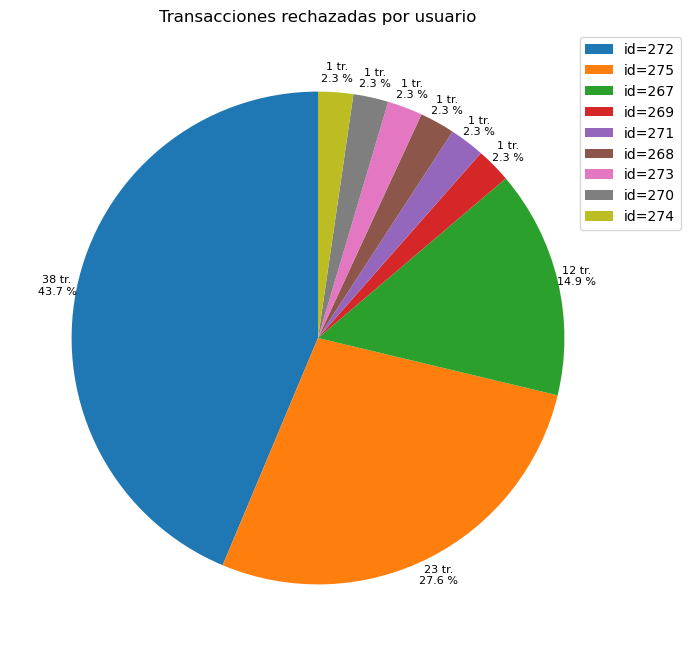

In [50]:
import mysql.connector
import matplotlib.pyplot as plt

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="xo6vH/NL^xT<Kf{XE`$%",
    database="ventas"
)

mycursor = mydb.cursor()
mycursor.execute("SELECT declined, user_id FROM transactions")
data = mycursor.fetchall()

columns = [i[0] for i in mycursor.description]

mydb.close()

transacciones = pd.DataFrame(data, columns=columns)

# Recuento de transacciones rechazadas
user_id_counts = transacciones.loc[transacciones['declined'] == 1, 'user_id'].value_counts()

# Etiquetas para los user_id
labels = ['id=' + str(user_id) for user_id in user_id_counts.index]

# Etiquetas con porcentaje y numero de transacciones rechazadas
def autopct_func(pct):
    count = int(pct / 100 * user_id_counts.sum())
    return '{:.0f} tr.\n{:.1f} %'.format(count, pct)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(user_id_counts, labels=None, autopct=autopct_func, startangle=90)

for autotext in autotexts:
    x, y = autotext.get_position()
    autotext.set_position((x * 1.8, y * 1.8)) 
    autotext.set_rotation(0) 
    autotext.set_fontsize(8)

plt.title('Transacciones rechazadas por usuario')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()


### - Ejercicio 6
Tres variables.

In [2]:
import mysql.connector
import pandas as pd


mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="xo6vH/NL^xT<Kf{XE`$%",
    database="ventas"
)

mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM transactions")
data = mycursor.fetchall()

columns = [i[0] for i in mycursor.description]

df = pd.DataFrame(data, columns=columns)

df

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91845898240,-12.52755619840
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96948858880,-117.52518359040
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.22268057600,-129.04987955200
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.35930552320,-100.55592806400
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.73814456320,158.29821030400
...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.31947171840,-11.41349120000
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01216819200,-64.67154380800
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86045317120,-172.34572933120
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07514337280,-142.24169564160


In [22]:
df.dtypes

id                     object
card_id                object
business_id            object
timestamp      datetime64[ns]
amount                 object
declined                int64
product_ids            object
user_id                 int64
lat                    object
longitude              object
year                    int32
dtype: object

In [27]:
# Los campos de tipo object dan problemas a la hora de graficarlos, se convierten a float las variables a graficar
columnas_a_convertir = ['amount', 'lat', 'longitude']
df[columnas_a_convertir] = df[columnas_a_convertir].apply(pd.to_numeric)
df.dtypes

id                     object
card_id                object
business_id            object
timestamp      datetime64[ns]
amount                float64
declined                int64
product_ids            object
user_id                 int64
lat                   float64
longitude             float64
year                    int32
dtype: object

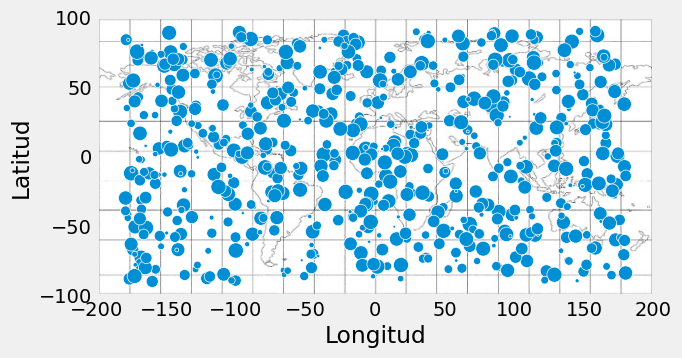

In [49]:
# Se van a representar el mismo scatterplot de antes, pero con el tamaño de los puntos que corresponden a las coordenadas variando en función de la variable 'amount',
# a través del parámetro de escala s

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fondo = mpimg.imread('map.jpg')

plt.imshow(fondo, extent=[-200, 200, -100, 100]) 

plt.scatter(df['longitude'], df['lat'], s=df['amount']/4, edgecolor='white')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(False)  # Quitar la malla porque la imagen del mapa ya tiene una

plt.show()

### - Ejercicio 7
Graficar un Pairplot.

In [52]:
# Este ejercicio se realiza de manera que se puedan usar los datos en los ejercicios posteriores, en concreto en el Nivel 2, ej. 1
# que requiere determinar la correlación de todas las variables numéricas
# Dado que el pairplot sirve para visualizar correlaciones entre variables, se genera un dataframe que se usará tanto para el pairplot como para el cálculo de la correlación
# Las variables numéricas que se pueden considerar son precio, peso, latitud, longitud y año de transacción. Otros valores numéricos como código postal, estado tarjeta, etc. realmente
# corresponden a variables categóricas
# Los campos seleccionados están en las tablas transactions y products. Se pueden extraer como dos dataframes y luego juntarlos o bien con una sola consulta que es la variante escogida

import mysql.connector
import pandas as pd


mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="xo6vH/NL^xT<Kf{XE`$%",
    database="ventas")

mycursor = mydb.cursor()

mycursor.execute("select year(timestamp) as `Año transacción`, price as Precio, weight as Peso, lat as Latitud, longitude as Longitud" \
" from transactions " \
" join products_transactions on transaction_id = transactions.id " \
" join products on products.id = products_transactions.product_id;")

data = mycursor.fetchall()

columns = [i[0] for i in mycursor.description]

df_num_categs = pd.DataFrame(data, columns=columns)
df_num_categs['Precio'] = df_num_categs['Precio'].str.replace('$', '')
mydb.close()

df_num_categs

,Año transacción,Precio,Peso,Latitud,Longitud
0,2021,103.73,2.7,81.91845898240,-12.52755619840
1,2021,161.11,1,81.91845898240,-12.52755619840
2,2021,60.33,0.6,81.91845898240,-12.52755619840
3,2021,82.15,2.7,-43.96948858880,-117.52518359040
4,2021,65.25,1,-43.96948858880,-117.52518359040
...,...,...,...,...,...
1452,2022,161.11,1,8.01216819200,-64.67154380800
1453,2021,26.66,1,-77.86045317120,-172.34572933120
1454,2021,169.96,2.7,-46.07514337280,-142.24169564160
1455,2021,59.80,0.6,-46.07514337280,-142.24169564160


In [53]:
# Conversión formato valores a número (con excepción del año que es de tipo integer)
columnas_a_convertir = ['Precio', 'Peso', 'Latitud', 'Longitud']
df_num_categs[columnas_a_convertir] = df_num_categs[columnas_a_convertir].apply(pd.to_numeric)
df_num_categs.dtypes

Año transacción      int64
Precio             float64
Peso               float64
Latitud            float64
Longitud           float64
dtype: object

c:\Users\rados\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


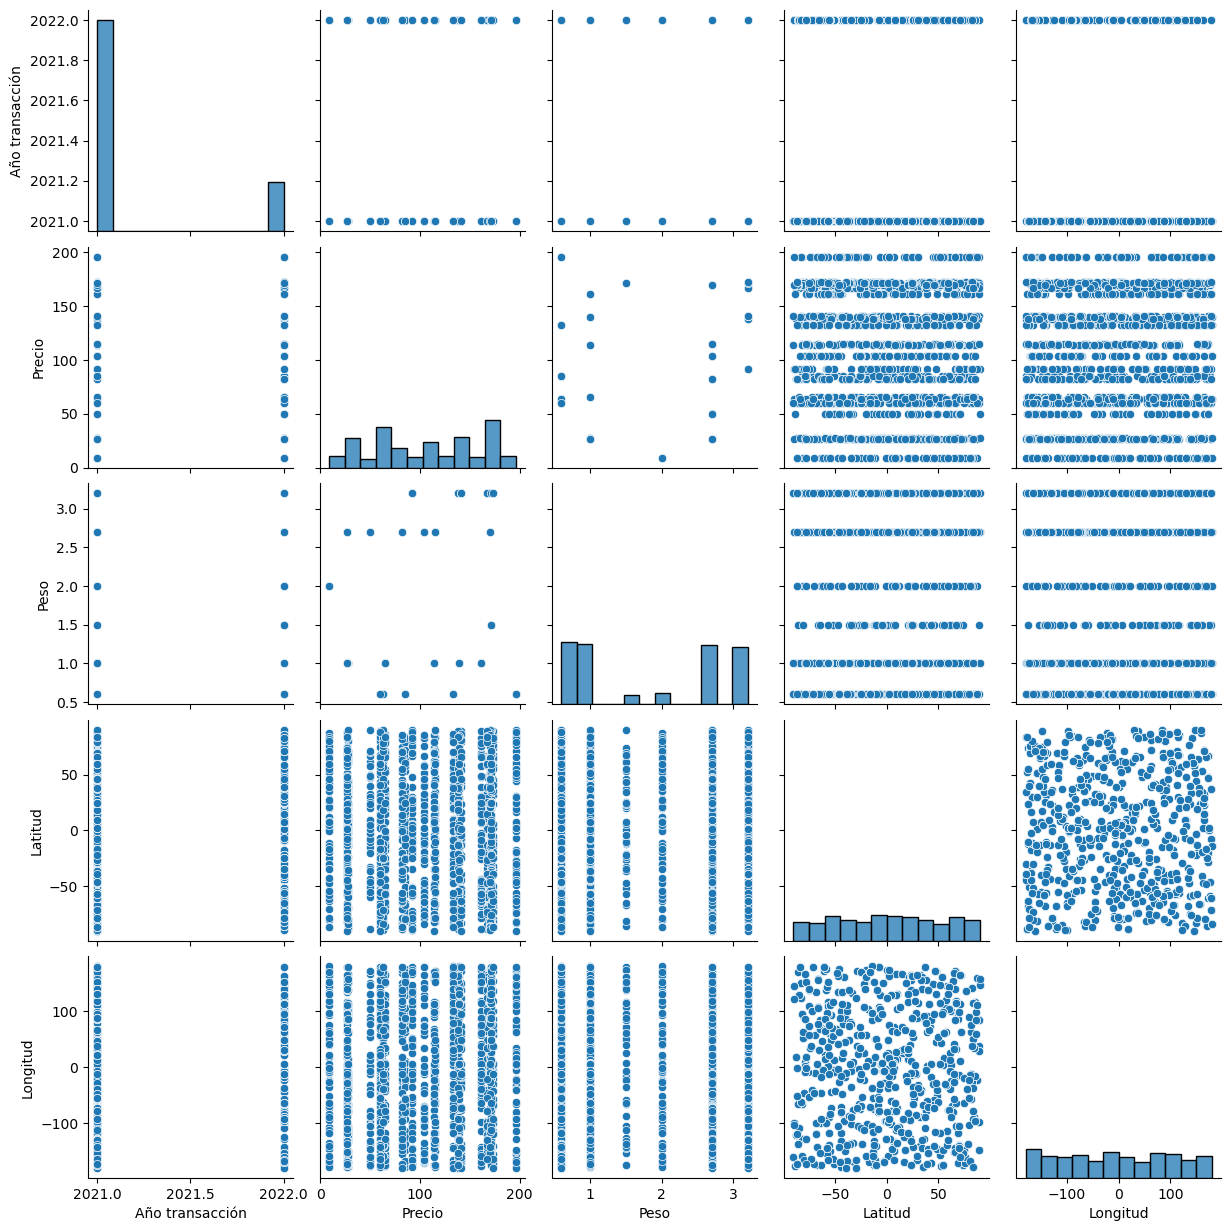

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_num_categs)
plt.show()

La distribución de los puntos es muy uniforme, lo que indica la ausencia de correlaciones, lo cual no es sorprendente dada la naturaleza de las variables. Las coordenadas ggeográficas son totalmente independientes por defincición; Entre precio y peso podría haber correlación si se tratase de un producto a granel por ejemplo, pero no es el caso. Al haber solo datos parciales de dos años tampoco se puede esperar apreciar una evolución temporal. Por último, los datos de latitud y lognitud, al ser ficticios, tampoco es de esperar que esttén correlacionados con el precio.

## Nivel 2
Ejercicio 1
Correlación de todas las variables numéricas.

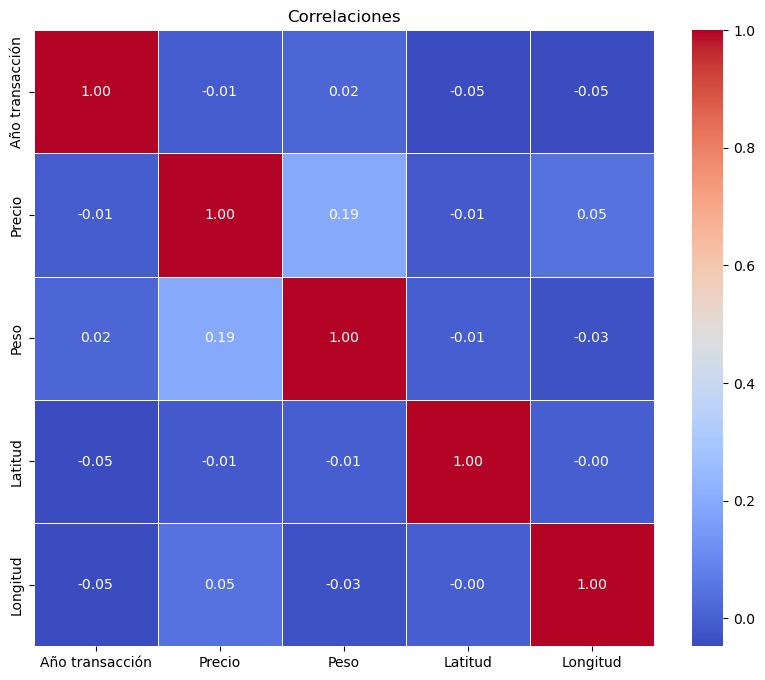

In [57]:
# Para la representar correlaciones, típicamente se emplea un gráfico de tipo heatmap
import seaborn as sns
corr_matrix=df_num_categs.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlaciones')
plt.show()

Los valores casi nulos de los elementos no diagonales indican la práctica ausencia de correlaciones, lo que concuerda con las observaciones sobre el pairplot. 

### Ejercicio 2
Implementa un jointplot.

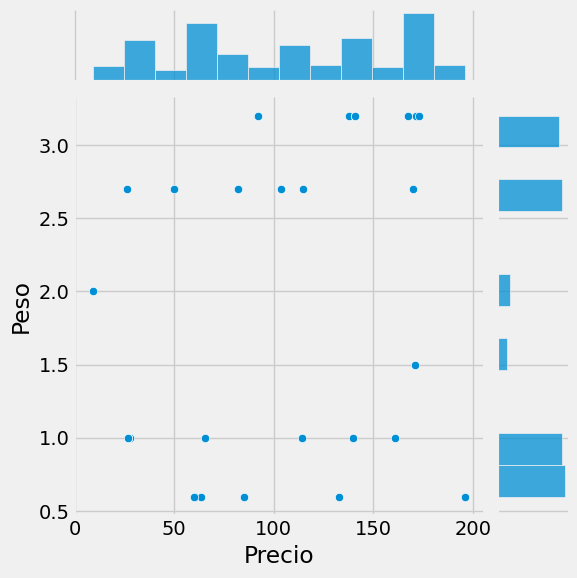

In [36]:
import seaborn as sns

sns.jointplot(x='Precio', y='Peso', data=df_num_categs)

plt.show()

Una vez más se compprueba que los datos presentan distribuciones aleatorias y no hay correlaciones entre ellos

## Nivel 3
Ejercicio 1
Implementa un violinplot combinado con otro tipo de gráfico.

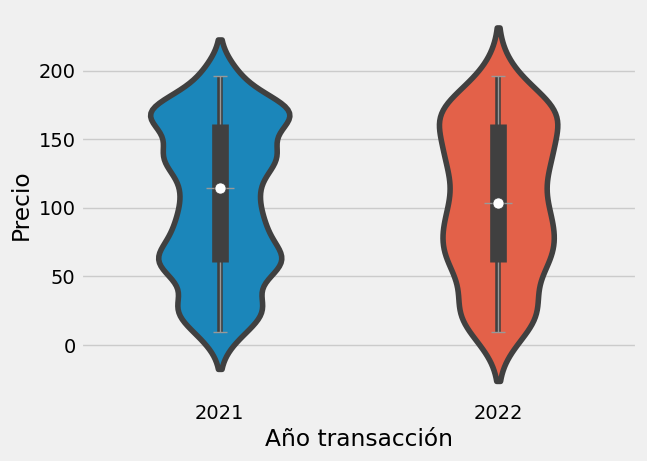

In [51]:
import seaborn as sns

sns.violinplot(x='Año transacción', y='Precio', data=df_num_categs, width=0.5)
sns.boxplot(x='Año transacción', y='Precio', data=df_num_categs, width=0.1, color='white', linewidth=1)
# sns.stripplot(x='Año transacción', y='Precio', data=df_num_categs, color='black', jitter=True)

plt.show()



### Ejercicio 2
Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

In [81]:
# Se van a representar datos de la tabla transactions

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="xo6vH/NL^xT<Kf{XE`$%",
    database="ventas")

mycursor = mydb.cursor()

mycursor.execute("SELECT timestamp, amount as Cantidad, declined FROM transactions")

data = mycursor.fetchall()

columns = [i[0] for i in mycursor.description]

mydb.close()

df_transactions = pd.DataFrame(data, columns=columns)
df_transactions

,timestamp,Cantidad,declined
0,2021-08-28 23:42:24,466.92,0
1,2021-07-26 07:29:18,49.53,0
2,2022-01-06 21:25:27,92.61,0
3,2022-01-26 02:07:14,394.18,0
4,2021-10-26 23:00:01,279.93,0
...,...,...,...
582,2022-03-13 00:27:34,78.29,0
583,2022-03-16 02:35:05,200.72,0
584,2021-06-13 11:41:17,42.32,0
585,2021-11-09 21:35:40,219.83,0


In [111]:
# El facetgrid se basará en los días de la semana, estado de la transacción como Rechazada o No rechazada y el valor de la transacción

# Se crea un campo con los días de la semana del timestamp
df_transactions['Día'] = df_transactions['timestamp'].dt.weekday
df_transactions['Día'] = df_transactions['Día'].map({0: 'Domingo', 1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves', 5: 'Viernes', 6: 'Sábado'})

# Se crea un campo con el estatus de la transacción
df_transactions['Rechazada'] = df_transactions['declined'].map({0: 'No', 1: 'Sí'})

df_transactions[['Cantidad', 'Día', 'Rechazada']]

,Cantidad,Día,Rechazada
0,466.92,Viernes,No
1,49.53,Domingo,No
2,92.61,Miércoles,No
3,394.18,Martes,No
4,279.93,Lunes,No
...,...,...,...
582,78.29,Sábado,No
583,200.72,Martes,No
584,42.32,Sábado,No
585,219.83,Lunes,No


c:\Users\rados\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


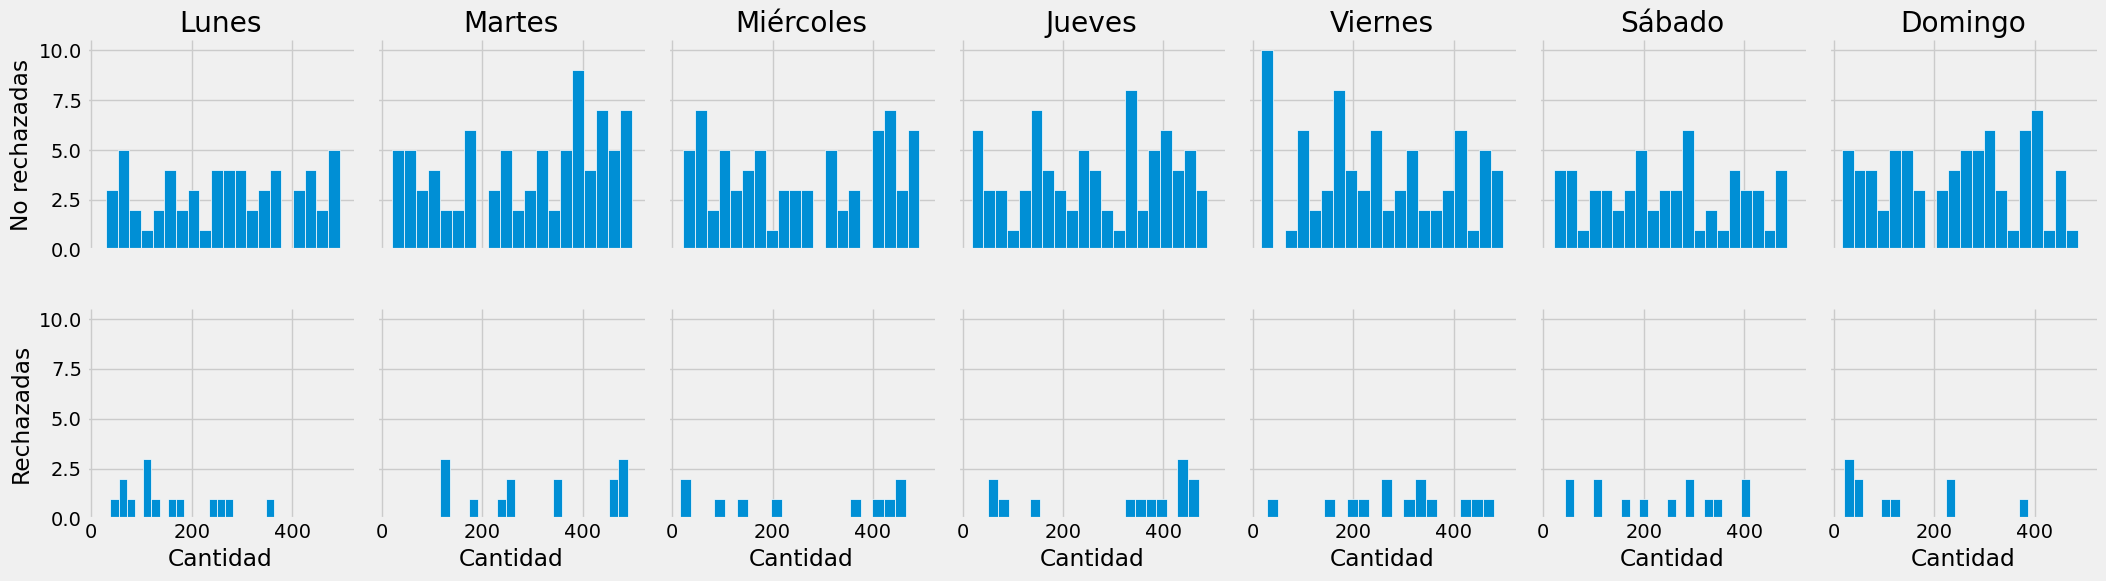

In [118]:

import seaborn as sns
import matplotlib.pyplot as plt


# Crear el FacetGrid
g = sns.FacetGrid(df_transactions, col="Día", row='Rechazada')

# Mapear un histograma en cada gráfico
g.map(plt.hist, "Cantidad", bins=20, edgecolor='white')

# Quitar los títulos por defecto por no ser muy estéticos
g.set_titles("", "")

# Poner etiquetas de Rechazadas/No rechazadas 
for ax, label in zip(g.axes[:, 0], ['No rechazadas', 'Rechazadas']):
    ax.set_ylabel(label)

# Poner etiquetas de los días como títulos
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

for ax, day in zip(g.axes[0], dias):
    ax.set_title(day)

plt.show()
